In [12]:
#matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text, desc, and_

In [15]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
inspector = inspect(conn)

In [16]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# Base.classes.keys()

# reflect the tables
measurement = Base.classes.measurement
station = Base.classes.station
inspector.get_table_names()

['measurement', 'station']

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
from sqlalchemy import desc

for x in session.query(measurement.date).order_by(desc(measurement.date)).first():
    print(x)

2017-08-23


In [21]:
session.query(measurement.date,measurement.prcp).filter(measurement.date >='2016-08-23').all()

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [22]:
query_results =  session.query(measurement.date,measurement.prcp).filter(measurement.date >='2016-08-23').all()

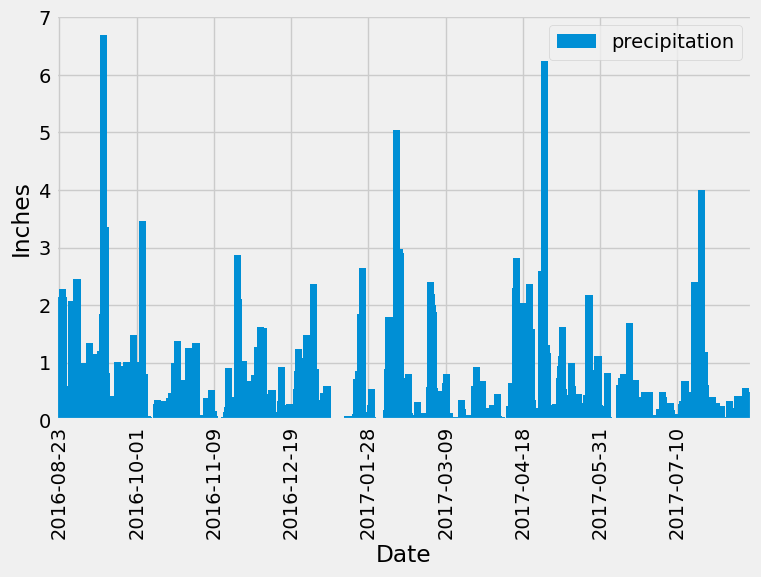

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# query = """ 
# select date, prcp  from measurement where date >='2016-08-23';
# """
df = session.query(measurement.date,measurement.prcp).filter(measurement.date >='2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(df)

# Sort the dataframe by date
df = df.sort_values("date", ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind='bar',figsize=(8,5),x = 'date', y = 'prcp', width=23, label= 'precipitation')
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(np.arange(0,len(df),250))

plt.show()


In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number of stations in the dataset

session.query(func.count(station.station)).all()[0][0]



9

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(desc(func.count(measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
m = measurement
session.query(m.station,func.min(m.tobs),func.max(m.tobs), func.avg(m.tobs)).filter(m.station =="USC00519281").all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [29]:
session.query(m.date).filter(m.station == 'USC00519281').order_by(desc(m.date)).first()

('2017-08-18',)

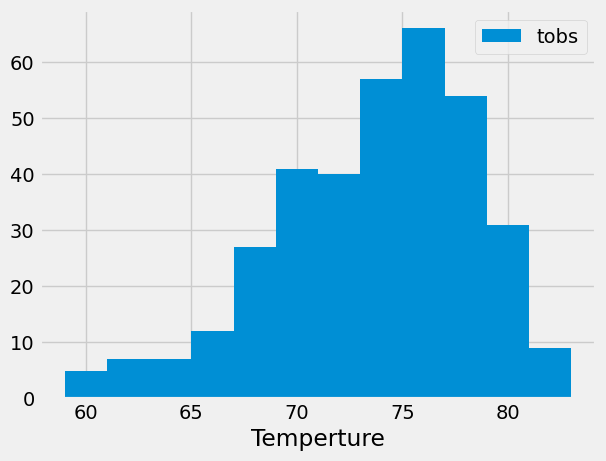

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df1 = session.query(m.station,m.date,m.prcp,m.tobs).filter(m.date >='2016-08-19').filter(m.date <='2017-08-18').filter(m.station =="USC00519281" ).all()
df1 = pd.DataFrame(df1)
tobs_data = df1['tobs']

plt.hist(tobs_data, bins=12)
plt.xlabel("Temperture")
plt.legend(['tobs'])
plt.show()

# Close Session

In [31]:
# Close Session
session.close()